<a href="https://colab.research.google.com/github/alisamir92/object-detection-by-Detecto/blob/master/object_detection_by_Detecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt
import os
import cv2
import PIL
import numpy as np
import pandas as pd
import shutil

In [ ]:
# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is not available.  Training on CPU ...


In [ ]:
# !unzip "/content/drive/My Drive/self_driving.zip" -d "/content/drive/My Drive/self_driving"

In [ ]:
!pip install detecto

In [ ]:
from detecto import core, utils, visualize






In [ ]:
classes = ['car', 'truck', 'person']
# classes = ['person', 'bicycle', 'car', 'truck', 'traffic light']

In [ ]:
train_images = "/content/drive/My Drive/self_driving/train_images/"

In [ ]:
print(len([name for name in os.listdir(train_images)]))

970


In [ ]:
test_images = "/content/drive/My Drive/self_driving/test_images/"

In [ ]:
test_list = []
for root , dirs, files in os.walk(test_images):
  for file in files:
    test_list.append(file)

In [ ]:
print(len(test_list))

122


In [ ]:
test_df_new = pd.read_csv("/content/drive/My Drive/self_driving/test_df.csv")

In [ ]:
train_df = pd.read_csv("/content/drive/My Drive/self_driving/labels_train.csv")
print(train_df.xmax.max())



479


In [ ]:
print(len(train_df))

6477


In [ ]:
files_t = []
for root , dirs, files in os.walk(train_images):
  for file in files:
    files_t.append(file)
    

In [ ]:
print(len(files_t))

970


In [ ]:
for i in train_df["frame"]:
  if i in files_t:
    continue
  d = train_df[ train_df['frame'] == i ].index
  train_df.drop(d, inplace=True)

In [ ]:
print(len(train_df.frame.unique()))
print(train_df.head())

970
                        frame  xmin  xmax  ymin  ymax  class_id
2461  1479502454739940895.jpg     0    54   113   238         1
2462  1479502454739940895.jpg    32    73   130   172         1
2463  1479502454739940895.jpg    55   147   124   191         1
2464  1479502454739940895.jpg   134   152   135   155         1
2465  1479502454739940895.jpg   136   354    86   267         1


In [ ]:
width_train = [480 for i in range(len(train_df))]
height_train = [300 for i in range(len(train_df))]


In [ ]:
train_df.insert(1, "width", width_train)
train_df.insert(2, "height", height_train)


In [ ]:

train_df["class_id"]= train_df["class_id"].replace(1, "car")
train_df["class_id"]= train_df["class_id"].replace(2, "truck")
train_df["class_id"]= train_df["class_id"].replace(3, "person")
# train_df["class_id"]= train_df["class_id"].replace(4, "bicycle")
# train_df["class_id"]= train_df["class_id"].replace(5, "traffic light")



In [ ]:

train_df = train_df[["frame", "width", "height", "class_id", "xmin", "ymin", "xmax", "ymax"]]


#check if the boxes are invalid

box_width = train_df["xmax"] - train_df["xmin"]
box_height = train_df["ymax"] - train_df["ymin"]

train_df.insert(8, "box_width", box_width)
train_df.insert(9, "box_height", box_height)

print(train_df.head())
print(len(train_df))




                        frame  width  height  ... ymax  box_width  box_height
2461  1479502454739940895.jpg    480     300  ...  238         54         125
2462  1479502454739940895.jpg    480     300  ...  172         41          42
2463  1479502454739940895.jpg    480     300  ...  191         92          67
2464  1479502454739940895.jpg    480     300  ...  155         18          20
2465  1479502454739940895.jpg    480     300  ...  267        218         181

[5 rows x 10 columns]
6477


In [ ]:
invalid_boxes_frame = []
for i in range(len(train_df)):
  if train_df.iloc[i]["box_height"] <= 0 or train_df.iloc[i]["box_width"] <= 0:
    invalid_boxes_frame.append(train_df.iloc[i]["frame"])

In [ ]:
print(invalid_boxes_frame)

[]


In [ ]:
# for i in invalid_boxes_frame:
#   train_df = train_df[train_df.frame != i]

In [ ]:
print(len(train_df))
print(any(train_df["box_height"]<=0))


6477
False


In [ ]:
train_df = train_df.drop(['box_width','box_height'], axis=1)


In [ ]:
print(train_df.head())

                        frame  width  height class_id  xmin  ymin  xmax  ymax
2461  1479502454739940895.jpg    480     300      car     0   113    54   238
2462  1479502454739940895.jpg    480     300      car    32   130    73   172
2463  1479502454739940895.jpg    480     300      car    55   124   147   191
2464  1479502454739940895.jpg    480     300      car   134   135   152   155
2465  1479502454739940895.jpg    480     300      car   136    86   354   267


In [ ]:
for name in os.listdir(train_images):
  if name in train_df["frame"].values:
    continue
  os.remove(os.path.join(train_images, name))

In [ ]:
print(len([name for name in os.listdir(train_images)]))

970


In [ ]:
print((train_df["frame"].nunique()))

970


In [ ]:
train_df.to_csv("/content/drive/My Drive/self_driving/train_df.csv", index=False)

In [ ]:
train_df_new = pd.read_csv("/content/drive/My Drive/self_driving/train_df.csv")
print(train_df_new.class_id.unique())

['car' 'person' 'truck']


In [ ]:
val_images = "/content/drive/My Drive/self_driving/val_images"

In [ ]:
print(len([name for name in os.listdir(val_images)]))

238


In [ ]:
val_df = pd.read_csv("/content/drive/My Drive/self_driving/labels_val.csv")
print(len(val_df))

8195


In [ ]:
files_v = []
for root , dirs, files in os.walk(val_images):
  for file in files:
    files_v.append(file)

In [ ]:
print(len(files_v))

238


In [ ]:
for i in val_df["frame"]:
  if i in files_v:
    continue
  v = val_df[ val_df['frame'] == i ].index
  val_df.drop(v, inplace=True)

In [ ]:
print((val_df.frame.nunique()))

238


In [ ]:
width_val = [480 for i in range(len(val_df))]
height_val = [300 for i in range(len(val_df))]

In [ ]:
val_df.insert(1, "width", width_val)
val_df.insert(2, "height", height_val)


In [ ]:
val_df["class_id"]= val_df["class_id"].replace(1, "car")
val_df["class_id"]= val_df["class_id"].replace(2, "truck")
val_df["class_id"]= val_df["class_id"].replace(3, "person")
# val_df["class_id"]= val_df["class_id"].replace(4, "bicycle")
# val_df["class_id"]= val_df["class_id"].replace(5, "traffic light")

In [ ]:
for i in val_df["class_id"]:
  if i == "traffic light" or i == "bicycle":
    v = val_df[ val_df['class_id'] == i ].index
    val_df.drop(v, inplace=True)

In [ ]:
val_df = val_df[["frame", "width", "height", "class_id", "xmin", "ymin", "xmax", "ymax"]]


box_width_v = val_df["xmax"] - val_df["xmin"]
box_height_v = val_df["ymax"] - val_df["ymin"]

val_df.insert(8, "box_width", box_width_v)
val_df.insert(9, "box_height", box_height_v)



In [ ]:
print(val_df.head())
print(len(val_df))

                     frame  width  height  ... ymax  box_width  box_height
0  1478899183816833874.jpg    480     300  ...  173         46          26
1  1478899183816833874.jpg    480     300  ...  171         13          11
2  1478899183816833874.jpg    480     300  ...  175         31          41
3  1478899183816833874.jpg    480     300  ...  168         13          14
4  1478899183816833874.jpg    480     300  ...  172          8           6

[5 rows x 10 columns]
1181


In [ ]:
invalid_boxes_frame_v = []
for i in range(len(val_df)):
  if val_df.iloc[i]["box_height"] <= 0 or val_df.iloc[i]["box_width"] <= 0:
    invalid_boxes_frame_v.append(val_df.iloc[i]["frame"])

In [ ]:
print(invalid_boxes_frame_v)

[]


In [ ]:
print(len(val_df))
print(any(val_df["box_height"]<=0))


1181
False


In [ ]:
val_df = val_df.drop(['box_width','box_height'], axis=1)


In [ ]:
print(val_df.head())

                     frame  width  height class_id  xmin  ymin  xmax  ymax
0  1478899183816833874.jpg    480     300      car    84   147   130   173
1  1478899183816833874.jpg    480     300      car   188   160   201   171
2  1478899183816833874.jpg    480     300    truck   210   134   241   175
3  1478899183816833874.jpg    480     300      car   240   154   253   168
4  1478899183816833874.jpg    480     300      car   278   166   286   172


In [ ]:
for name in os.listdir(val_images):
  if name in val_df["frame"].values:
    continue
  os.remove(os.path.join(val_images, name))

In [ ]:
print(len([name for name in os.listdir(val_images)]))

236


In [ ]:
print((val_df["class_id"].unique()))

['car' 'truck' 'person']


In [ ]:
val_df.to_csv("/content/drive/My Drive/self_driving/val_df.csv", index=False)

In [ ]:
val_df_new = pd.read_csv("/content/drive/My Drive/self_driving/val_df.csv")
print((val_df_new["class_id"].unique()))

['car' 'truck' 'person']


(300, 480, 3)


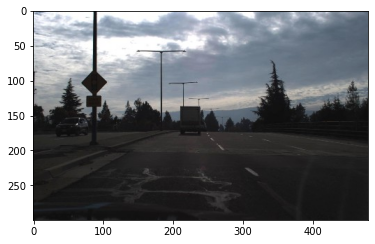

In [ ]:
image = utils.read_image('/content/drive/My Drive/self_driving/val_images/1478899185531354079.jpg')
print(image.shape)
plt.imshow(image)
plt.show()

In [ ]:
transform_img = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(800),
    transforms.RandomHorizontalFlip(0.5),
    # transforms.RandomRotation(20, resample=PIL.Image.BILINEAR),
    transforms.ToTensor(),
    utils.normalize_transform(),
])

In [ ]:
train_dataset = core.Dataset('/content/drive/My Drive/self_driving/train_df.csv', '/content/drive/My Drive/self_driving/train_images/', transform=transform_img)
print(len(train_dataset))
# dataset[i] returns a tuple containing our transformed image and
# and a dictionary containing label and box data
image, target = train_dataset[200]
print(image.shape)
print(target)
# Show our image along with the box. Note: it may
# be colored oddly due to being normalized by the 
# dataset and then reverse-normalized for plotting


6477
torch.Size([3, 800, 1280])
{'boxes': tensor([[197, 336, 413, 496]]), 'labels': 'car'}


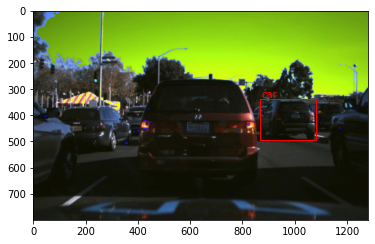

In [ ]:
visualize.show_labeled_image(image, target['boxes'], target['labels'])



In [ ]:
val_dataset = core.Dataset('/content/drive/My Drive/self_driving/val_df.csv', '/content/drive/My Drive/self_driving/val_images/', transform=transform_img)

In [ ]:
print(len(val_dataset))

1181


In [ ]:
train_loader = core.DataLoader(train_dataset, batch_size=3, shuffle=True)
val_loader = core.DataLoader(val_dataset, batch_size=3, shuffle=True)
print(len(train_loader))
print(len(val_loader))

2159
394


In [ ]:
model = core.Model(classes, device="cuda")
# device="cuda"

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


In [ ]:
print(model)

In [ ]:
torch_model = model.get_internal_model()
print(torch_model)

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256)
          (relu): ReLU(inplace=True)
          (downsample)

In [ ]:
for name, p in torch_model.named_parameters():
  print(name, p.requires_grad)

#   # if 'roi_heads' not in name:
#   #   p.requires_grad = False
    
#   # print(torch_model.roi_heads.box_predictor.cls_score)
  
#   print(name, p.requires_grad)




backbone.body.conv1.weight False
backbone.body.layer1.0.conv1.weight False
backbone.body.layer1.0.conv2.weight False
backbone.body.layer1.0.conv3.weight False
backbone.body.layer1.0.downsample.0.weight False
backbone.body.layer1.1.conv1.weight False
backbone.body.layer1.1.conv2.weight False
backbone.body.layer1.1.conv3.weight False
backbone.body.layer1.2.conv1.weight False
backbone.body.layer1.2.conv2.weight False
backbone.body.layer1.2.conv3.weight False
backbone.body.layer2.0.conv1.weight True
backbone.body.layer2.0.conv2.weight True
backbone.body.layer2.0.conv3.weight True
backbone.body.layer2.0.downsample.0.weight True
backbone.body.layer2.1.conv1.weight True
backbone.body.layer2.1.conv2.weight True
backbone.body.layer2.1.conv3.weight True
backbone.body.layer2.2.conv1.weight True
backbone.body.layer2.2.conv2.weight True
backbone.body.layer2.2.conv3.weight True
backbone.body.layer2.3.conv1.weight True
backbone.body.layer2.3.conv2.weight True
backbone.body.layer2.3.conv3.weight True


Epoch 1 of 10


/usr/local/lib/python3.6/dist-packages/torchvision/ops/boxes.py:101: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  keep = keep.nonzero().squeeze(1)


Loss: 0.16298467553300336
Epoch 2 of 10
Loss: 0.16641716087500388
Epoch 3 of 10
Loss: 0.16602520860422476
Epoch 4 of 10
Loss: 0.16852179596438738
Epoch 5 of 10
Loss: 0.1718790507942413
Epoch 6 of 10
Loss: 0.16524267888720212
Epoch 7 of 10
Loss: 0.169245688419767
Epoch 8 of 10
Loss: 0.16797348781221505
Epoch 9 of 10
Loss: 0.16876878759095873
Epoch 10 of 10
Loss: 0.16821677333641416


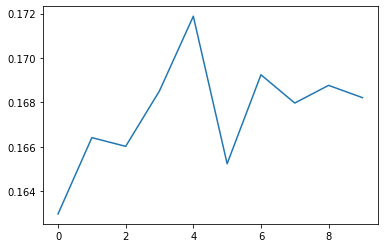

In [ ]:

losses = model.fit(train_loader, val_dataset, epochs=10, learning_rate=0.005, weight_decay= 0.0005, verbose=True)
model.save("/content/drive/My Drive/self_driving/model.pth")
  
  
# Plot the accuracy over time
plt.plot(losses)
plt.show()

In [ ]:
model_t = core.Model.load("/content/drive/My Drive/self_driving/model.pth", classes)

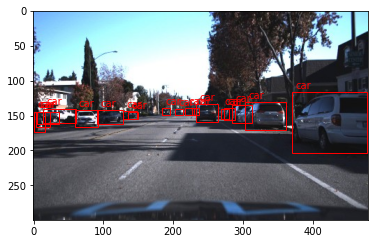

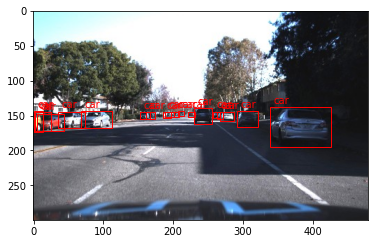

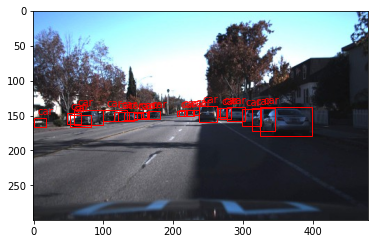

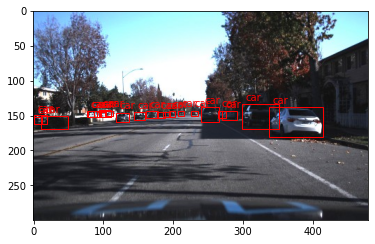

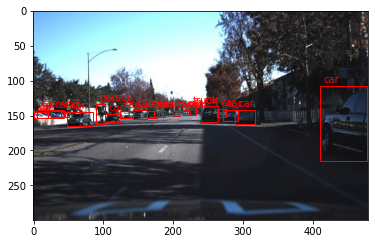

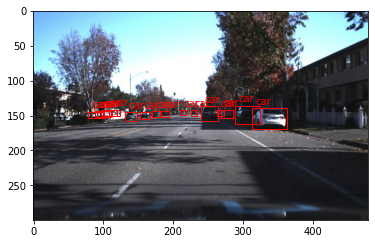

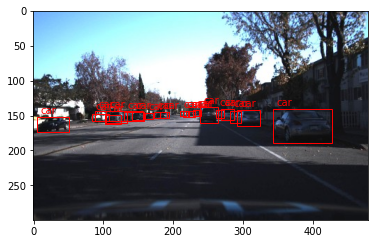

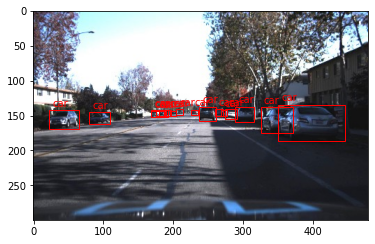

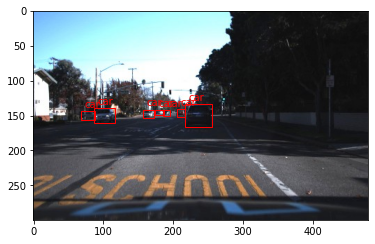

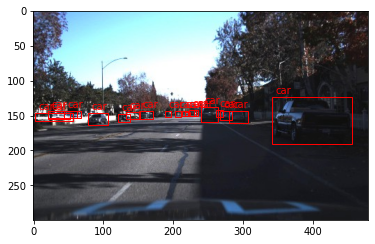

In [ ]:
images = []
for i in range(102,122,2):
  image = utils.read_image(os.path.join("/content/drive/My Drive/self_driving/test_images/", test_list[i]))
  images.append(image)
  labels, boxes, scores = model_t.predict(image)
  visualize.show_labeled_image(image, boxes, labels)

